Text(0.5, 1.0, 'profit vs population')

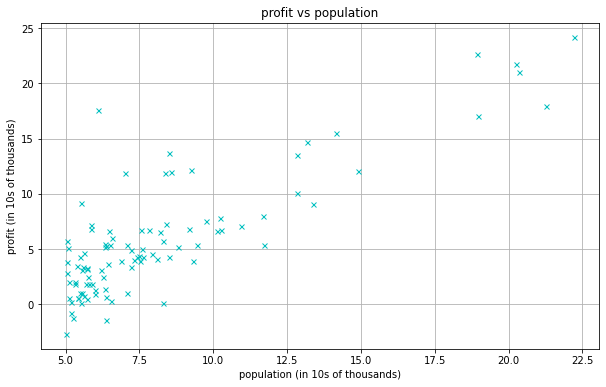

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data2.csv')
x = df['pop'].tolist()
y = df['profit'].tolist()

plt.figure(figsize=(10,6))
plt.plot(x, y, 'cx', markersize=5)
plt.grid(True)
plt.ylabel('profit (in 10s of thousands)')
plt.xlabel('population (in 10s of thousands)')
plt.title('profit vs population')

In [2]:
def h(x, theta_0, theta_1):
    return theta_0+theta_1*x

def j(theta_0, theta_1, x, y):
    val = ((h(x, theta_0, theta_1))-y)**2
    return (1/(2*len(df)))*val

# exercise:
res = 0
for i in range(0, len(x), 1):
    res+=j(0,0,x[i],y[i])

In [3]:
res

32.072733877455676

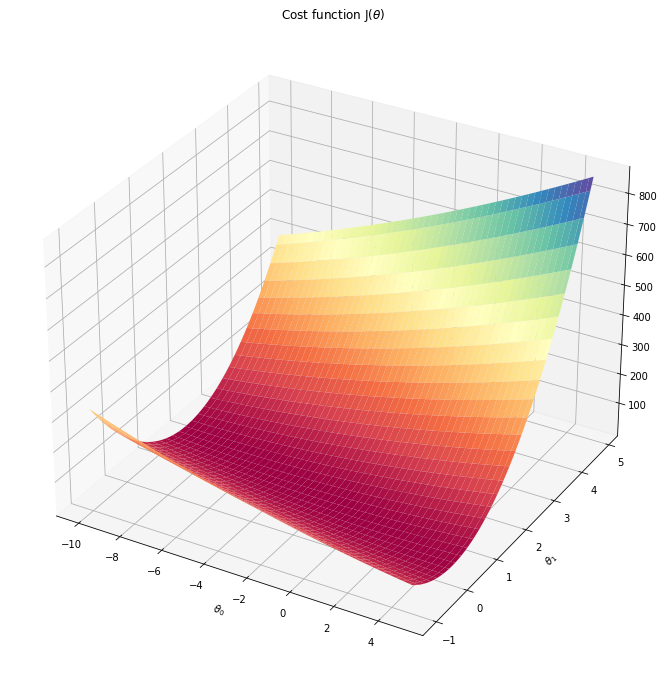

In [4]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,12))
x_range = np.arange(-10,5,0.1)
y_range = np.arange(-1,5,0.1)
xs, ys = np.meshgrid(x_range, y_range)
j_values = []

res = 0
for i in x_range:
    for k in y_range:
        for n in range(0, len(df), 1):
            res += j(i, k, x[n], y[n])
        j_values.append(res)
        res = 0
        
        
j_values = np.array([j_values])
j_values = np.reshape(j_values, xs.shape, order='F')
        
ax.plot_surface(xs,ys,j_values, cmap = cm.Spectral)

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title(r'Cost function J($\theta$)',fontsize=12)
plt.show()

In [5]:
def dj_dt0(x, y, theta_0, theta_1):
    val = (1/len(df))*(0.01)*(h(x,theta_0,theta_1)-y)
    return val

def dj_dt1(x, y, theta_0, theta_1):
    val = (1/len(df))*(0.01)*(h(x,theta_0,theta_1)-y)*x
    return val

In [6]:
temp0=0
temp1=0
theta_0=0
theta_1=0
convergence_graph = []
convergence_theta = 0

for i in range(0,1500,1):
    for k in range(0, len(df), 1):
        temp0 += dj_dt0(x[k],y[k],theta_0,theta_1)
        temp1 += dj_dt1(x[k],y[k],theta_0,theta_1)
        convergence_theta += j(theta_0, theta_1, x[k], y[k])
    
    convergence_graph.append(convergence_theta)
    theta_0 = theta_0 - temp0
    theta_1 = theta_1 - temp1
    temp0 = 0
    temp1 = 0
    convergence_theta = 0

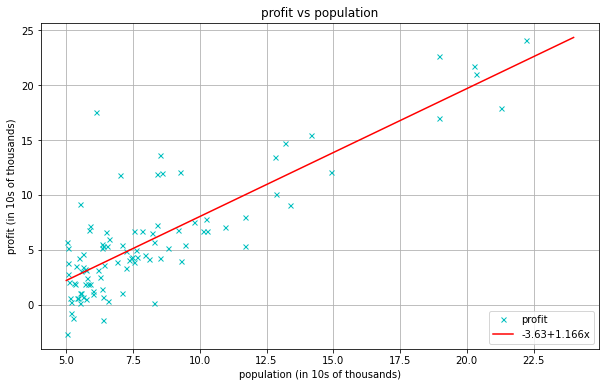

In [8]:
hyp = [(theta_0+theta_1*x) for x in range(5,25,1)]
hyp_x = [x for x in range(5,25,1)]

plt.figure(figsize=(10,6))
plt.plot(x, y, 'cx', markersize=5)
plt.plot(hyp_x, hyp, 'r')
plt.grid(True)
plt.ylabel('profit (in 10s of thousands)')
plt.xlabel('population (in 10s of thousands)')
plt.title('profit vs population')
hypothesis = '{}+{}x'.format(round(theta_0,3),round(theta_1,3))
plt.legend(['profit', hypothesis], loc="lower right")

Text(0.5, 0, 'n iterations')

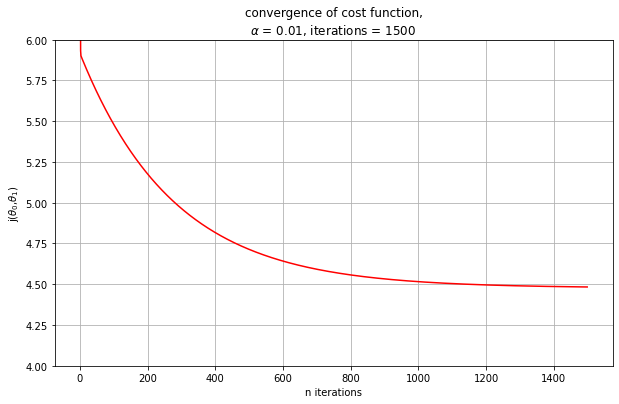

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([4, 6])
ax.plot(convergence_graph, 'r')
ax.grid(True)
plt.title('convergence of cost function,\n' r'$\alpha$ = 0.01, iterations = 1500')
plt.ylabel(r'j($\theta_0$,$\theta_1$)')
plt.xlabel('n iterations')